**Interpretação estatística:**

O script a seguir tem a finalidade de criar funções que geram os seguintes resumos estatísticos:


*   Quartil 25 %, 50%, 75%;
*   Limites superiores e inferiores pelo método IQR;
*   Z-scores de cada linha do rol de dados;
*   Coeficiente de assimetria de Pearson;
*   Média, desvio padrão e contagem de dados;
*   Contagem de valores acima e abaixo dos limites para outliers;
*   Porcentagem de valores acima e abaixo dos outliers.


Criar gráficos com intuito de guiar o usuário na escolha de qual metodo estatístico  utilizar em sua limpeza de dados.


*   QQ plot;
*   Box plot;
*   Histograma;
*   Distribuição dos Z-scores;
*   Box plot mensal para cada variável.

In [184]:
from datetime import date, datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import openpyxl

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
df=pd.read_excel("/content/drive/Shareddrives/PUB_Meteorologia/Planilhas_limpas/INMET_horarios_automatica/dados_A009_H_2004-12-16_2023-06-12.xlsx", engine='openpyxl', sheet_name="Plan1")

In [ ]:
df.head(10)

In [188]:
df=df.rename(columns={ 'Data Medicao':'DATA'})

In [189]:
df['ANO'] = df['DATA'].dt.year
df['MES'] = df['DATA'].dt.month

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df["DATA"], df['T AR (°C)'], label='PREC', color='g', ls='-', lw='2');
plt.legend(loc=1, fontsize=14)
plt.ylabel('Precipitação (mm/dia)')
plt.xlabel('Anos')
plt.title('Precipitação (mm/dia) de 2007 a 2021')
plt.axis(xmin=df.DATA[0], xmax=df.DATA[5489])
plt.show()

In [ ]:
df[["PREC (mm)",	"P ATM (mB)",	"QG (Kj/m²)",	"T AR (°C)"	,"UR (%)",	"U2 (m/s)"]].describe().T

In [192]:
df.loc[df.MES == 1,'MES']='Jan'
df.loc[df.MES == 2,'MES']='Fev'
df.loc[df.MES == 3,'MES']='Mar'
df.loc[df.MES == 4,'MES']='Abr'
df.loc[df.MES == 5,'MES']='Mai'
df.loc[df.MES == 6,'MES']='Jun'
df.loc[df.MES == 7,'MES']='Jul'
df.loc[df.MES == 8,'MES']='Ago'
df.loc[df.MES == 9,'MES']='Set'
df.loc[df.MES == 10,'MES']='Out'
df.loc[df.MES == 11,'MES']='Nov'
df.loc[df.MES == 12,'MES']='Dez'


In [ ]:
dados = df[["MES",'Hora Medicao','PREC (mm)','P ATM (mB)','QG (Kj/m²)','T AR (°C)','UR (%)','U2 (m/s)']]
grafico_variaveis = pd.melt(dados, id_vars=['MES'], value_vars=['U2 (m/s)','T AR (°C)'], var_name='Legenda')
# style: whitegrid, darkgrid, white, dark, ticks
sns.set(style='whitegrid', font_scale=1.5, rc={'font.size':25})
t = sns.catplot(x='MES', y='value', data=grafico_variaveis, hue='Legenda', palette='pastel', kind='box',
height=9, # Altura
width=0.7, # Largura das caixas de boxplot
aspect=1.5, # Tamanho do gráfico
legend=True, # Adicionar legenda
legend_out=True, # Legenda dentro ou fora da caixa
saturation=10, # Intensidade das cores
linewidth=1.4, # Espessura da linha
ci=95, # Intervalo de confiança
fliersize=4 # Espessura dos outliers
);
plt.grid(True);
plt.grid(axis='x'); # Linhas horizontais e verticais
plt.title('Precipitação X Temperatura Máxima', fontsize=25); # Título do gráfico
t.set_axis_labels('Meses', 'Temperatura (ºC)', fontsize=25); # Títulos dos eixos x e y
t.set(ylim=(0, 50)); # Limites do eixo y
t.despine(right=False); # Linha à direita
# t.savefig('grafico.png', dpi=50) # Salvar o gráfico em .png

In [194]:
# A função “skew()” do Python mede o grau de
# simetria da curva em relação à distribuição
# normal (ou Gaussiana):
# skew = 0, distribuição simétrica;
# skew > 0, assimétrica positiva (à direita);
# skew < 0, assimétrica negativa (à esquerda).


In [ ]:
print('Precipitação:', df['PREC (mm)'].skew())
print('Pressão atmosférica:', df['P ATM (mB)'].skew())
print('Radiação solar:', df['QG (Kj/m²)'].skew())
print('Umidade relativa:', df['UR (%)'].skew())
print('Temperatura média do ar:', df['T AR (°C)'].skew())
print('Velocidade do vento a 2 metros:', df['U2 (m/s)'].skew())

In [196]:
# Observamos acima que a distribuição normal é encontrada em valores
# de pressão atmosférica, radiação solar e umidade relativa
# pois os valores de skew estão muito próximos de zero;

In [197]:
# Para dados normais utilize o Z-score
# para dados não normais utilize o IQR ou percentil

In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['PREC (mm)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['PREC (mm)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['PREC (mm)'])
plt.title('Boxplot')
plt.show()

In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['P ATM (mB)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['P ATM (mB)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['P ATM (mB)'])
plt.title('Boxplot')
plt.show()


In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['T AR (°C)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['T AR (°C)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['T AR (°C)'])
plt.title('Boxplot')
plt.show()

In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['QG (Kj/m²)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['QG (Kj/m²)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['QG (Kj/m²)'])
plt.title('Boxplot')
plt.show()

In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['UR (%)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['UR (%)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['UR (%)'])
plt.title('Boxplot')
plt.show()

In [ ]:
# Plotar os gráficos:
plt.figure(figsize=(24,8))
# Histograma:
plt.subplot(1,3,1)
plt.hist(df['U2 (m/s)'],bins=30)
plt.title('Histograma')
# Q-Q:
plt.subplot(1,3,2)
stats.probplot(df['U2 (m/s)'],
dist='norm',plot=plt)
plt.ylabel('quantiles')
# Boxplot:
plt.subplot(1,3,3)
sns.boxplot(y=df['U2 (m/s)'])
plt.title('Boxplot')
plt.show()

In [204]:
def CalculoBoxPlot(Coluna):
  LimSup = df[Coluna].mean() + (3*df[Coluna].std()) #Limite superior
  LimInf = df[Coluna].mean() - (3*df[Coluna].std()) #Limite inferior
  # Calcular a quantidade de valores que estão abaixo ou
  # acima do inferior e superior (valores extremos):
  df_aux = df[Coluna]
  LS = df_aux > LimSup
  LI = df_aux < LimInf
  # Contar a quantidade de valores extremos:
  sum_LS = df_aux[LS].count()
  sum_LI = df_aux[LI].count()
  # Calcular o percentual:
  per_sum_LS = (sum_LS*100)/5479
  per_sum_LI = (sum_LI*100)/5479
  print("Resumo dos 5 números para", Coluna,":")
  print('LimSup:', round(LimSup,2))
  print('LimInf:', round(LimInf,2))
  print('Quantidade acima de LS:',sum_LS)
  print('Quantidade abaixo de LI:',sum_LI)
  print('LS(%):', round(per_sum_LS,2))
  print('LI(%):', round(per_sum_LI,2))

In [ ]:
CalculoBoxPlot("PREC (mm)")

In [ ]:
CalculoBoxPlot('PREC (mm)')

In [ ]:
CalculoBoxPlot('P ATM (mB)')

In [ ]:
CalculoBoxPlot('QG (Kj/m²)')

In [ ]:
CalculoBoxPlot('T AR (°C)')

In [ ]:
CalculoBoxPlot('UR (%)')

In [ ]:
CalculoBoxPlot('U2 (m/s)')

In [ ]:
df.head(10)

In [213]:
# Calcular os quartis:
Q3 = df["PREC (mm)"].quantile(0.75)
Q1 = df["PREC (mm)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [214]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 0.0 Q3 =  0.0 IQR = 0.0 LimSup = 0.0 LimInf = 0.0


In [215]:
# Calcular os quartis:
Q3 = df["P ATM (mB)"].quantile(0.75)
Q1 = df["P ATM (mB)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [ ]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)

In [217]:
# Calcular os quartis:
Q3 = df["QG (Kj/m²)"].quantile(0.75)
Q1 = df["QG (Kj/m²)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [218]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 290.81350000000003 Q3 =  2319.64975 IQR = 2028.83625 LimSup = 5362.904125 LimInf = -2752.440875


In [219]:
# Calcular os quartis:
Q3 = df["P ATM (mB)"].quantile(0.75)
Q1 = df["P ATM (mB)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [220]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 977.1 Q3 =  980.6 IQR = 3.5 LimSup = 985.85 LimInf = 971.85


In [221]:
# Calcular os quartis:
Q3 = df["P ATM (mB)"].quantile(0.75)
Q1 = df["P ATM (mB)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [222]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 977.1 Q3 =  980.6 IQR = 3.5 LimSup = 985.85 LimInf = 971.85


In [223]:
# Calcular os quartis:
Q3 = df["P ATM (mB)"].quantile(0.75)
Q1 = df["P ATM (mB)"].quantile(0.25)
# Calcular o IQR:
IQR = Q3 - Q1
# Calcular o LI e LS:
LimSup = Q3 + (IQR * 1.5)
LimInf = Q1 - (IQR * 1.5)

In [224]:
print("Q1 =", Q1,"Q3 = ", Q3, "IQR =", IQR,"LimSup =", LimSup,"LimInf =", LimInf)


Q1 = 977.1 Q3 =  980.6 IQR = 3.5 LimSup = 985.85 LimInf = 971.85


In [225]:
# Coeficiente de assimetria de Pearson:
# As=3(média-mediana)/desvio padrão
# Próximo de zero ela é simétrica

In [226]:
# As=3(média-mediana)/desvio padrão

In [227]:
def Calculadora_Assimetria (Coluna):
  AS=3*(df[Coluna].mean()-df[Coluna].median())/(df[Coluna].std())
  print("Coeficiente de assimetria para:", Coluna, AS)

In [ ]:
Calculadora_Assimetria("PREC (mm)")
Calculadora_Assimetria("P ATM (mB)")
Calculadora_Assimetria("QG (Kj/m²)")
Calculadora_Assimetria("T AR (°C)")
Calculadora_Assimetria("UR (%)")
Calculadora_Assimetria("U2 (m/s)")

In [323]:
assimetria_chuva=3*(df["PREC (mm)"].mean()-df["PREC (mm)"].median())/(df["PREC (mm)"].std())

In [324]:
assimetria_pressao=3*(df["P ATM (mB)"].mean()-df["P ATM (mB)"].median())/(df["P ATM (mB)"].std())

In [325]:
assimetria_radiacao=3*(df["QG (Kj/m²)"].mean()-df["QG (Kj/m²)"].median())/(df["QG (Kj/m²)"].std())

In [326]:
assimetria_temperatura=3*(df["T AR (°C)"].mean()-df["T AR (°C)"].median())/(df["T AR (°C)"].std())

In [327]:
assimetria_umidade=3*(df["UR (%)"].mean()-df["UR (%)"].median())/(df["UR (%)"].std())

In [328]:
assimetria_vento=3*(df["U2 (m/s)"].mean()-df["U2 (m/s)"].median())/(df["U2 (m/s)"].std())

In [235]:
df["U2 (m/s)"].std()

1.5899909292626229

In [236]:
print("Valores do Coeficiente de Pearson")
print("Precipitação =",assimetria_chuva,"Pressão atmosférica =",assimetria_pressao)
print("Radiação solar =",assimetria_radiacao,"Temperatura do ar =",assimetria_temperatura)
print("Umidade Relativa =",assimetria_umidade,"Velocidade do vento =",assimetria_vento)

Valores do Coeficiente de Pearson
Precipitação = 0.3887381195678971 Pressão atmosférica = -0.13171586521477785
Radiação solar = 0.30383498407144177 Temperatura do ar = -0.09878687980340031
Umidade Relativa = -0.24809202048145892 Velocidade do vento = 0.6019685813043232


In [237]:
# Estatística uni ou multivariada:
# Utilizando z_score
# Método que avalia quantos desvios padrão o valor observado está situado além da média;
# 3 desvios é o limite para outlier e pode ser negativo ou positivo;

In [238]:
z_scores=(df["PREC (mm)"]-np.mean(df["PREC (mm)"]))/np.std(df["PREC (mm)"])

In [239]:
z_scores2=(df["P ATM (mB)"]-np.mean(df["P ATM (mB)"]))/np.std(df["P ATM (mB)"])

In [240]:
z_scores3=(df["QG (Kj/m²)"]-np.mean(df["QG (Kj/m²)"]))/np.std(df["QG (Kj/m²)"])

In [241]:
z_scores4=(df["T AR (°C)"]-np.mean(df["T AR (°C)"]))/np.std(df["T AR (°C)"])

In [242]:
z_scores5=(df["UR (%)"]-np.mean(df["UR (%)"]))/np.std(df["UR (%)"])

In [243]:
z_scores6=(df["U2 (m/s)"]-np.mean(df["U2 (m/s)"]))/np.std(df["U2 (m/s)"])

In [ ]:
plt.plot(z_scores)
plt.axis(ymin=-4,ymax=4)
plt.title("PREC (mm)")

In [ ]:
plt.plot(z_scores2)
plt.axis(ymin=-4,ymax=4)
plt.title("P ATM (mB)")

In [ ]:
plt.plot(z_scores3)
plt.axis(ymin=-4,ymax=4)
plt.title("QG (Kj/m²)")

In [ ]:
plt.plot(z_scores4)
plt.axis(ymin=-4,ymax=4)
plt.title("P ATM (mB)")

In [ ]:
plt.plot(z_scores)
plt.axis(ymin=-4,ymax=4)
plt.title("UR (%)")

Text(0.5, 0, 'horas')

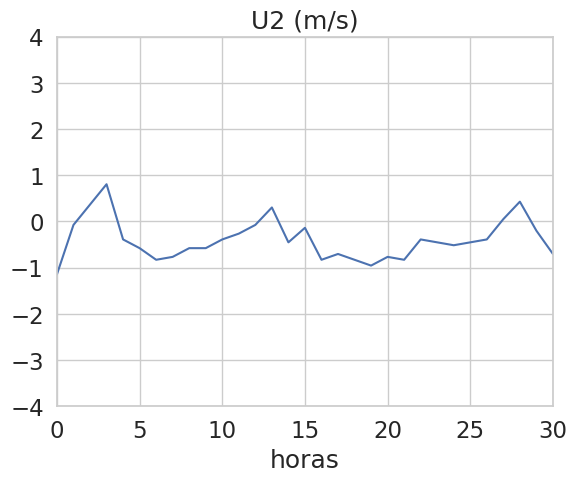

In [330]:
plt.plot(z_scores6)
plt.axis(ymin=-4,ymax=4)
plt.axis(xmin=0,xmax=30)
plt.title("U2 (m/s)")
plt.xlabel("horas")